In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import os

file_path = r'C:\Users\ARUL\Documents\EDUCATIONAL SHIT\kuliah coy\sem 1\FP STATPROB\imdb_top_1000.csv'
# file_path = 'imdb_top_1000.csv'
data = pd.read_csv(file_path)

data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Ini adalah data yang ditunjukkan oleh pandas dengan beberapa column yang tertera di dalam csv

In [3]:
data.head(), data.columns

(                                         Poster_Link  \
 0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
 1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
 2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
 3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
 4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
 
                Series_Title Released_Year Certificate  Runtime  \
 0  The Shawshank Redemption          1994           A  142 min   
 1             The Godfather          1972           A  175 min   
 2           The Dark Knight          2008          UA  152 min   
 3    The Godfather: Part II          1974           A  202 min   
 4              12 Angry Men          1957           U   96 min   
 
                   Genre  IMDB_Rating  \
 0                 Drama          9.3   
 1          Crime, Drama          9.2   
 2  Action, Crime, Drama          9.0   
 3          Crime, Drama          9.0   
 4          Crime, Drama          9.0   
 
    

sedangkan ini adalah data yang sudah dipecah dengan baris dan kolumn yang tertera, ini nantinya akan di analisis.
berdasarkan dataset ini, kolom yang tertera antara lain:
1. Poster_Link
2. Series_Title, Relesed_Year, Certificate, Runtime
3. Genre, IMDB_Rating
4. Meta_score
5. Director, Star1 , Star2, Star3, Star4
6. No_of_Votes
7. Gross

In [4]:
#analisis distribusi data (zelig)

Analisis Korelasi,
menggunakan beberapa kolom yang relevan, seperti:
1. IMDB_Rating
2. Meta_score
3. No_of_Votes
4. Gross (pendapatan film)
5. Runtime

sebelum dianalisis, kolom Gross perlu diubah ke dalam format numerik agar dapat dianalisis dan mendapatkan nilai dari setiap kolom runtime.
Berikut adalah data yang sudah diformatkan dan dianaliskan korelasinya:

In [5]:
#analisis korelasi data (irul)
data['Gross'] = data['Gross'].replace(',', '', regex=True).replace('None', None).astype(float)
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)

numeric_data = data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']]
correlation_matrix = numeric_data.corr()

correlation_matrix

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ARUL\AppData\Local\Temp\ipykernel_22340\4252971347.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)


,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime
IMDB_Rating,1.000000,0.268531,0.494979,0.095923,0.243096
Meta_score,0.268531,1.000000,-0.018507,-0.030587,-0.031452
No_of_Votes,0.494979,-0.018507,1.000000,0.574393,0.173264
Gross,0.095923,-0.030587,0.574393,1.000000,0.139671
Runtime,0.243096,-0.031452,0.173264,0.139671,1.000000


Tabel diatas merupakan tabel yang menunjukkan perbandingan antara nilai-nilai yang berbeda dalam bentuk matriks korelasi. Korelasi dihitung menggunakan metode Pearson.

Interpretasi Nilai Korelasi(r):
1. 0 < r > 1 = korelasi positif (hubungan positif)
2. -1 < r > 0 = korelasi negatif (hubungan negatif)

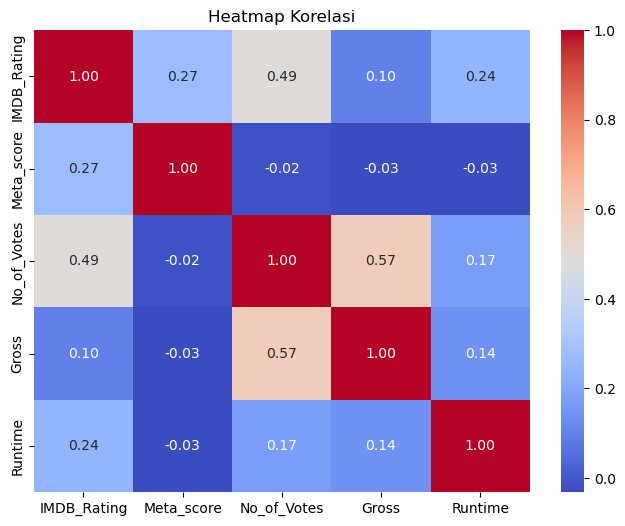

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Dari visual Heatmap Korelasi ini menunjukkan bahwa
1. Korelasi antara No_of_Votes (angka vote) dengan Gross(angka penjualan) menunjukkan hubungan positif sedang.

2. Korelasi antara No_of_Votes (angka vote) dengan IMDB_Rating menunjukkan hubungan positif sedang.

3. Korelasi antara IMDB_Rating dengan 

**Analisis popularitas**

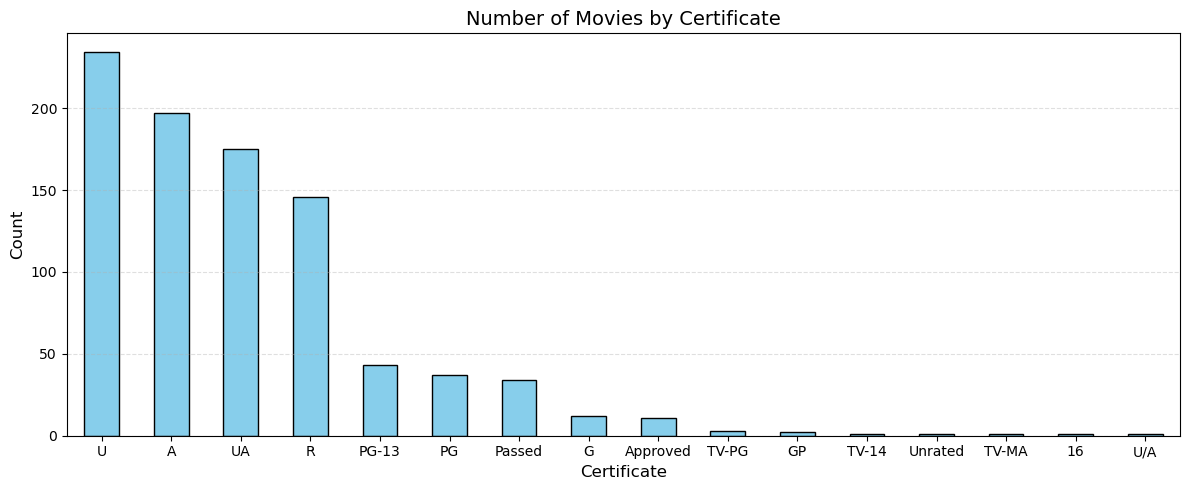

In [10]:
#analisis popularitas data (kaisar)

# Group the data by "Certificate" and count the occurrences
certificate_counts = data["Certificate"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 5))
certificate_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Number of Movies by Certificate", fontsize=14)
plt.xlabel("Certificate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Show the plot
plt.tight_layout()
plt.show()


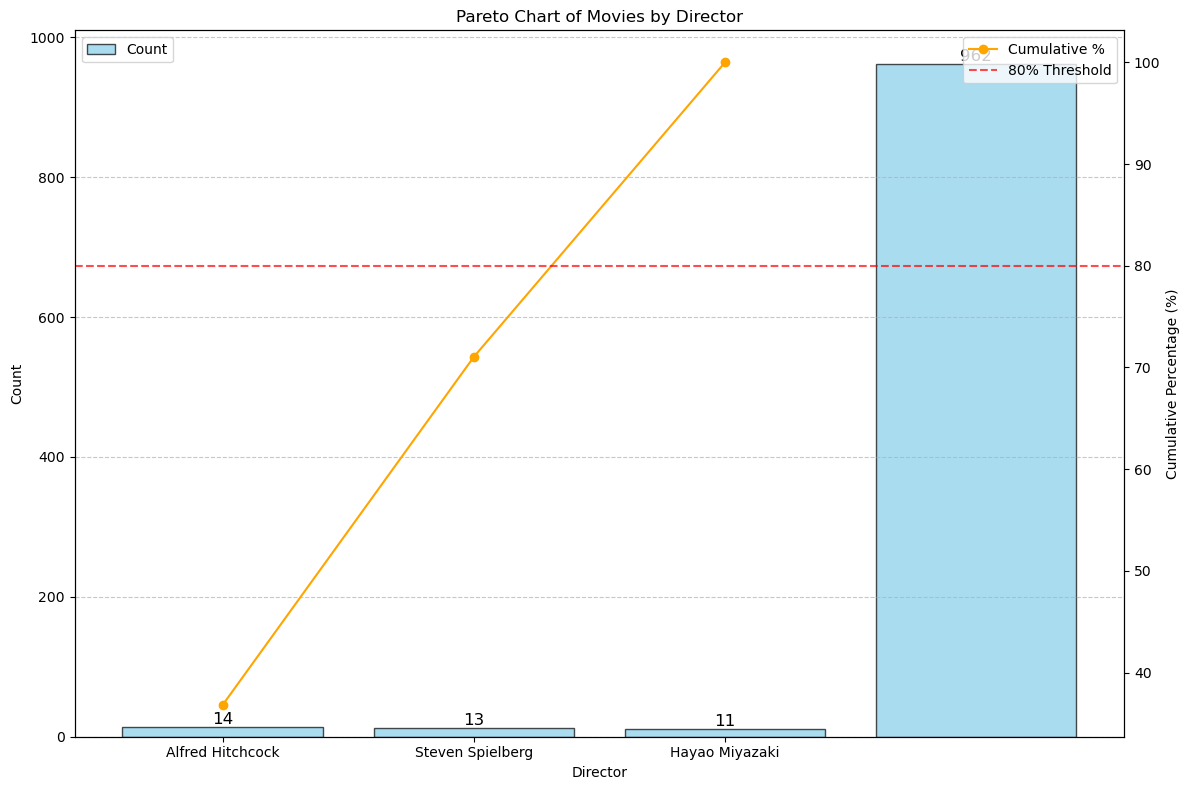

In [72]:

# Count movies by director
director_counts = data['Director'].value_counts()

# Define threshold for "Others"
threshold = 0.011  # Categories representing less than 1.2% will be grouped


total = director_counts.sum()

# Separate "Others" and calculate cumulative percentage excluding "Others"
filtered_counts = director_counts[director_counts / total >= threshold]
others_count = director_counts[director_counts / total < threshold].sum()

# Sort the filtered counts
filtered_counts_sorted = filtered_counts.sort_values(ascending=False)

# Calculate cumulative percentage, skipping the first bar for plotting
cumulative_percentage = filtered_counts_sorted.cumsum() / filtered_counts_sorted.sum() * 100

# Add "Others" after calculating cumulative percentage
if others_count > 0:
    filtered_counts_sorted["Others"] = others_count

# Create the Pareto Chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for counts
bars = ax1.bar(
    filtered_counts_sorted.index,
    filtered_counts_sorted.values,
    color="skyblue",
    edgecolor="black",
    alpha=0.7,
    label="Count"
)

# Annotate bar chart with counts
for bar, count in zip(bars, filtered_counts_sorted.values):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{count}",
        ha="center",
        va="bottom",
        fontsize=12,
        color="black"
    )

ax1.set_xlabel("Director")
ax1.set_ylabel("Count")
ax1.set_title("Pareto Chart of Movies by Director")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Line chart for cumulative percentage starting from the second bar
ax2 = ax1.twinx()
ax2.plot(
    filtered_counts_sorted.index[:-1],  # Start from the second bar
    cumulative_percentage.values,  # Skip the first category in cumulative percentage
    color="orange",
    marker="o",
    label="Cumulative %"
)
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.axhline(80, color="red", linestyle="--", alpha=0.7, label="80% Threshold")

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

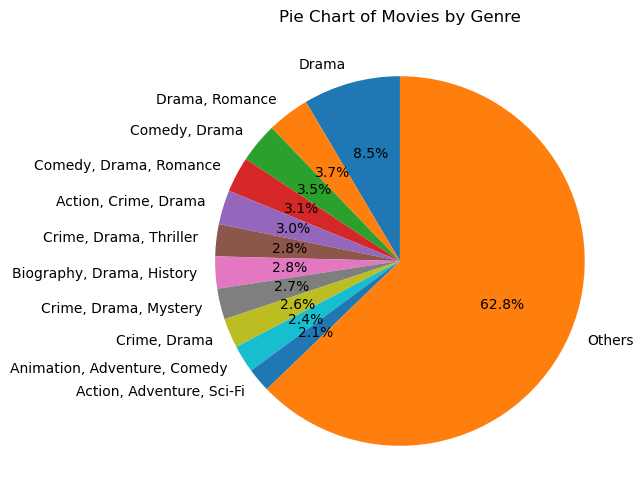

In [59]:
# Calculate cumulative percentages
genre_counts_large = data["Genre"].value_counts()

threshold = 0.02 # Categories representing less than 5% will be grouped
total = genre_counts_large.sum()
other_count = genre_counts_large[genre_counts_large / total < threshold].sum()
filtered_counts = genre_counts_large[genre_counts_large / total >= threshold]
filtered_counts["Others"] = other_count

# For Pareto Chart: Sort and calculate cumulative percentage
filtered_counts_sorted = filtered_counts.sort_values(ascending=False)
cumulative_percentage_large = filtered_counts_sorted.cumsum() / filtered_counts_sorted.sum() * 100

# Plotting
plt.figure(figsize=(16, 6))

# Subplot 1: Pie Chart
plt.subplot(1, 2, 1)
filtered_counts.plot(
    kind="pie", autopct="%1.1f%%", colors=plt.cm.tab10.colors, startangle=90, legend=False
)
plt.title("Pie Chart of Movies by Genre")
plt.ylabel("")


# Show the plots
plt.show()